In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline 

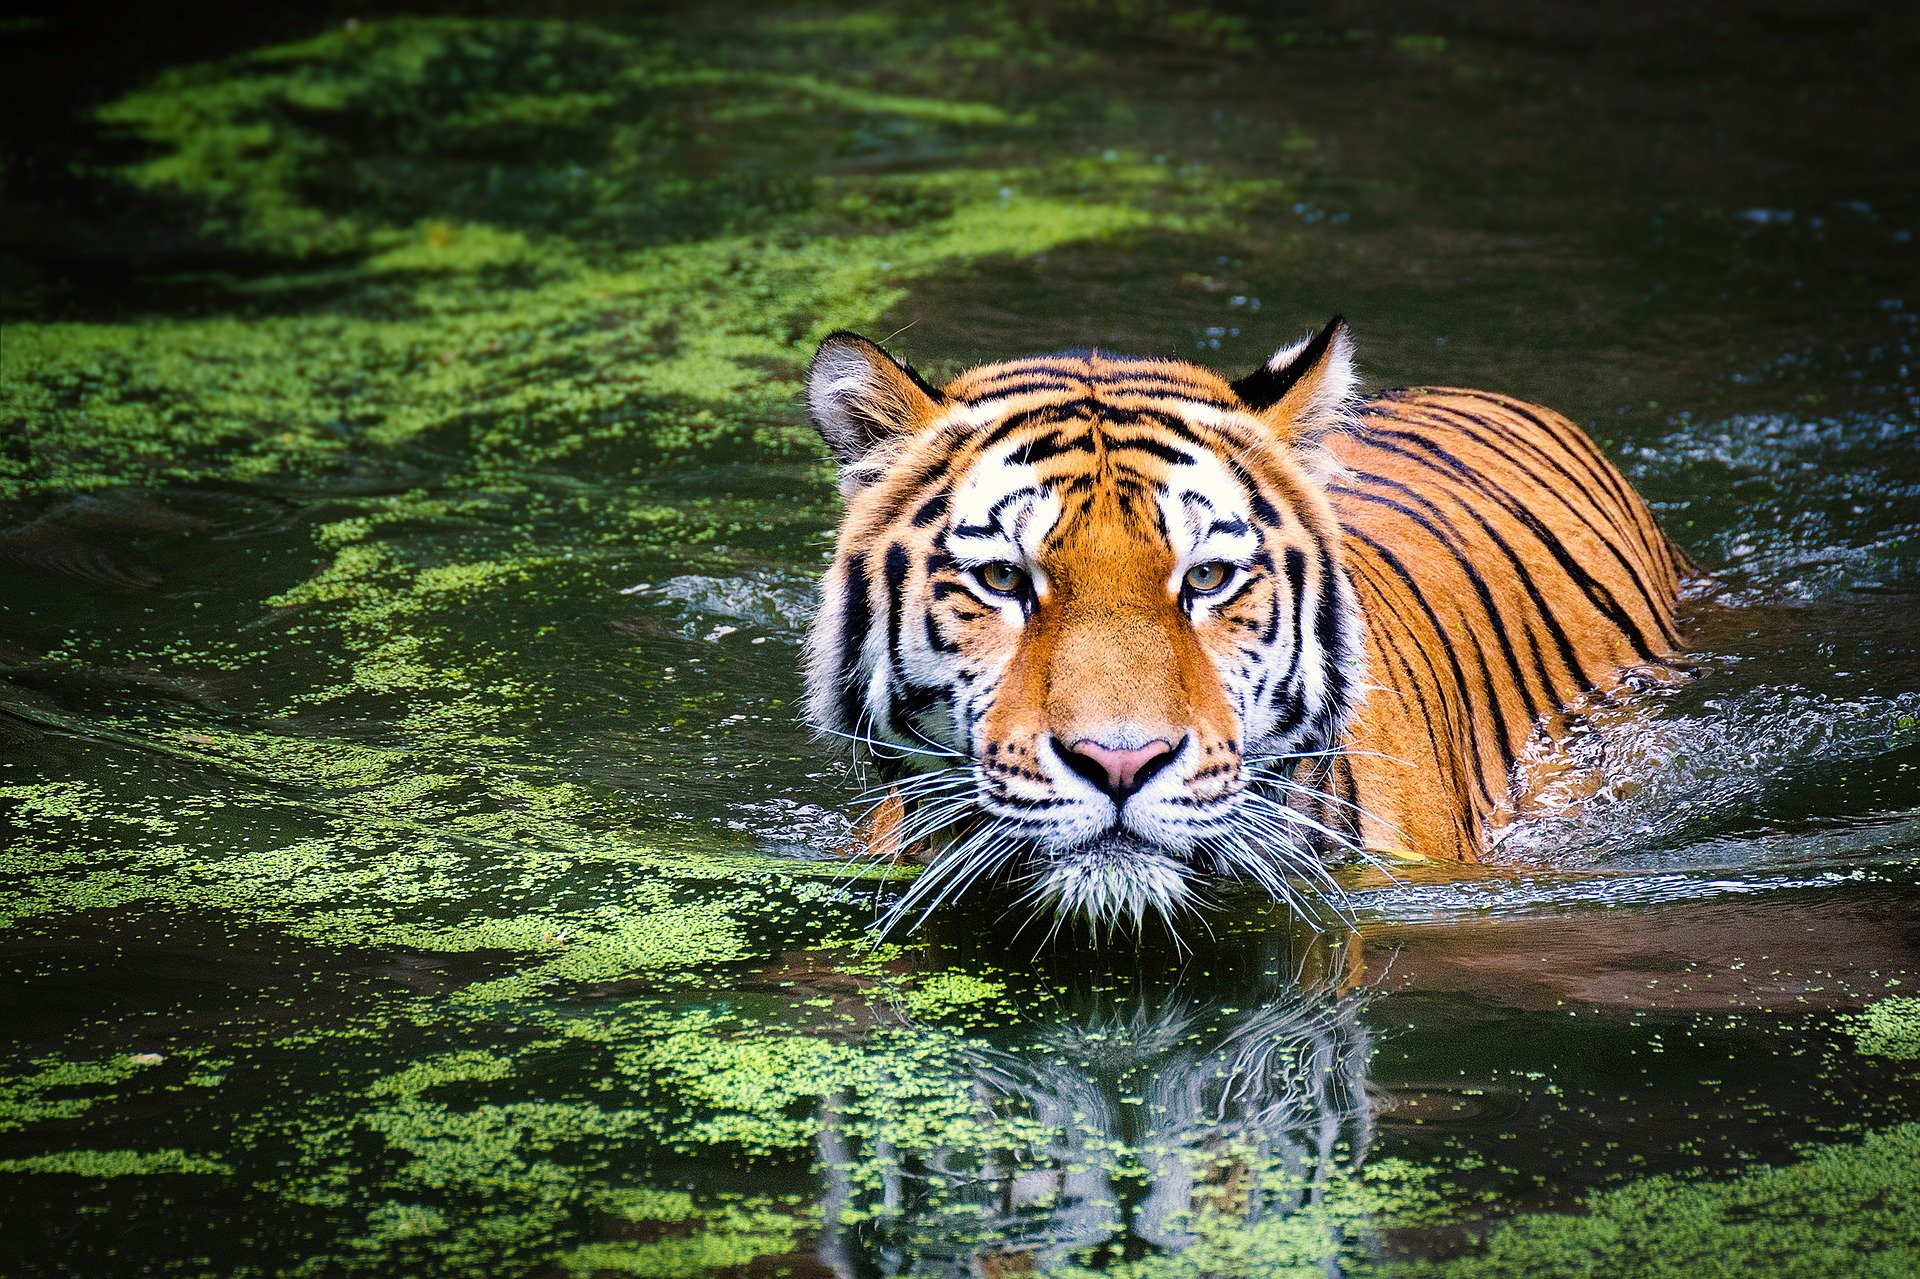

In [3]:
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.image as mpimg

img = Image .open(r'D:\image\tiger.jpg')
img

### img corresponding values

In [4]:
img_np=np.asarray(img)
img_np[0:2]

array([[[ 2,  2,  0],
        [ 2,  2,  0],
        [ 2,  2,  0],
        ...,
        [18, 19, 14],
        [18, 19, 14],
        [19, 20, 15]],

       [[ 3,  3,  1],
        [ 3,  3,  1],
        [ 3,  3,  1],
        ...,
        [18, 19, 14],
        [18, 19, 14],
        [19, 20, 15]]], dtype=uint8)

### Get the image dimension

In [5]:
img_np.shape

(1279, 1920, 3)

### Reshape the data

In [6]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(2455680, 3)

In [7]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(n_clusters=16)

In [8]:
pixel_centroids=model.labels_
cluster_centers =model.cluster_centers_
pixel_centroids

array([ 5,  5,  5, ..., 14,  0,  0])

In [9]:
cluster_centers

array([[ 93.77181759, 123.65846022,  56.20668659],
       [ 28.76190115,  36.20564934,  21.33249896],
       [229.43876014, 225.9214815 , 177.14143981],
       [237.72172669, 238.00563275, 240.68697636],
       [136.91689076, 146.13175475, 151.47405667],
       [ 13.07925359,  16.94926619,   9.25997479],
       [206.36736129, 138.03041064,  76.57576522],
       [ 69.19392605,  76.93043723,  71.02632886],
       [151.85578552,  89.8694626 ,  36.45079884],
       [101.27504291, 108.65534957, 108.89429296],
       [129.68203307, 160.0273209 ,  82.27530894],
       [173.31486146, 199.84851421, 130.30746332],
       [240.36737355, 177.97689652, 124.4755109 ],
       [ 46.11867859,  56.5352319 ,  34.38558148],
       [ 65.56955569,  87.93547162,  37.21491543],
       [181.23173172, 186.26953074, 197.70652926]])

In [10]:
final=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range (16):
    final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[13.07925359, 16.94926619,  9.25997479],
       [13.07925359, 16.94926619,  9.25997479],
       [13.07925359, 16.94926619,  9.25997479],
       [13.07925359, 16.94926619,  9.25997479],
       [13.07925359, 16.94926619,  9.25997479]])

In [11]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(1279, 1920, 3)

In [17]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save(r'D:\image\tiger_compressed.jpg')
img_1=mpimg.imread(r'D:\image\tiger.jpg')
img_2=mpimg.imread(r'D:\image\tiger_compressed.jpg')

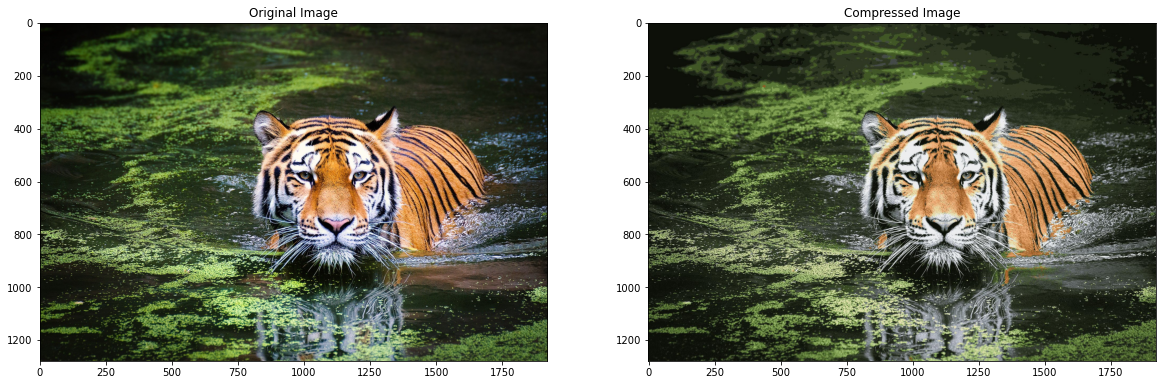

In [23]:

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()

